# Tutorial

In [1]:
using EISAnalysis

## Circuit Elements

This package includes Resistors, Capacitors, CPEs, Inductors, and Warburgs which can be called through the following variables:

`r, c, q, l, wo, ws`

with default parameter values. They are all `CircuitElement` types. Here let's call a resistor and a capacitor

In [2]:
r

EISAnalysis.Resistor(1.0, Real[100000.0, 71968.5673001152, 51794.746792312115, 37275.9372031494, 26826.957952797256, 19306.977288832502, 13894.954943731376, 10000.0, 7196.85673001152, 5179.474679231211  …  0.019306977288832503, 0.013894954943731377, 0.01, 0.007196856730011521, 0.005179474679231211, 0.00372759372031494, 0.002682695795279726, 0.0019306977288832503, 0.0013894954943731376, 0.001], ComplexF64[1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im  …  1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im])

In [3]:
c

EISAnalysis.Capacitor(1.0, Real[100000.0, 71968.5673001152, 51794.746792312115, 37275.9372031494, 26826.957952797256, 19306.977288832502, 13894.954943731376, 10000.0, 7196.85673001152, 5179.474679231211  …  0.019306977288832503, 0.013894954943731377, 0.01, 0.007196856730011521, 0.005179474679231211, 0.00372759372031494, 0.002682695795279726, 0.0019306977288832503, 0.0013894954943731376, 0.001], ComplexF64[0.0 - 1.0e-5im, 0.0 - 1.3894954943731376e-5im, 0.0 - 1.93069772888325e-5im, 0.0 - 2.682695795279726e-5im, 0.0 - 3.72759372031494e-5im, 0.0 - 5.179474679231211e-5im, 0.0 - 7.196856730011521e-5im, 0.0 - 0.0001im, 0.0 - 0.00013894954943731376im, 0.0 - 0.00019306977288832504im  …  0.0 - 51.79474679231211im, 0.0 - 71.9685673001152im, 0.0 - 100.0im, 0.0 - 138.94954943731375im, 0.0 - 193.06977288832502im, 0.0 - 268.2695795279726im, 0.0 - 372.759372031494im, 0.0 - 517.947467923121im, 0.0 - 719.685673001152im, 0.0 - 1000.0im])

Each circuit element stores a frequency vector `ω` and its AC impedance `Z` over that frequency.

Now we can generate all kinds of circuits, which themselves are also `CircuitElement` types

In [4]:
series_circuit = r-c
parallel_circuit = r/c
combined_circuit = r-r/c #can also by constructed by combined_circuit = r-parallel_circuit

EISAnalysis.Circuit(Real[100000.0, 71968.5673001152, 51794.746792312115, 37275.9372031494, 26826.957952797256, 19306.977288832502, 13894.954943731376, 10000.0, 7196.85673001152, 5179.474679231211  …  0.019306977288832503, 0.013894954943731377, 0.01, 0.007196856730011521, 0.005179474679231211, 0.00372759372031494, 0.002682695795279726, 0.0019306977288832503, 0.0013894954943731376, 0.001], ComplexF64[1.0000000001 - 9.999999999e-6im, 1.0000000001930698 - 1.389495494104868e-5im, 1.0000000003727594 - 1.9306977281635643e-5im, 1.0000000007196856 - 2.6826957933490283e-5im, 1.0000000013894954 - 3.727593715135466e-5im, 1.0000000026826958 - 5.179474665336256e-5im, 1.0000000051794746 - 7.196856692735584e-5im, 1.00000001 - 9.999999900000002e-5im, 1.000000019306977 - 0.000138949546754618im, 1.000000037275936 - 0.0001930697656914686im  …  1.9996273795257427 - 0.01929978311379866im, 1.9998069674958532 - 0.013892272765783583im, 1.999900009999 - 0.00999900009999im, 1.9999482079357644 - 0.007196483989945

You can easily plot circuits using the `plot_Nyquist` function

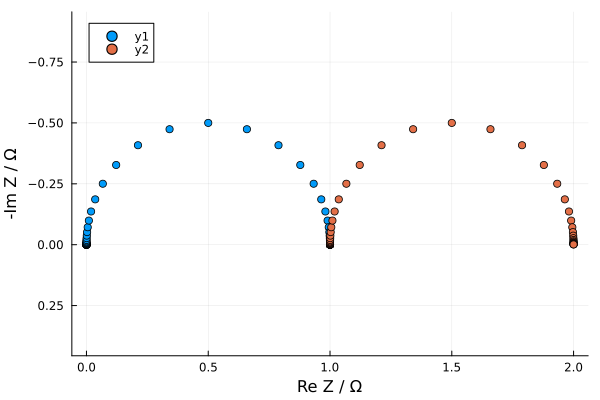

In [5]:
plt = plot_Nyquist(parallel_circuit,combined_circuit)

You can also set the parameters of your circuit in the following way

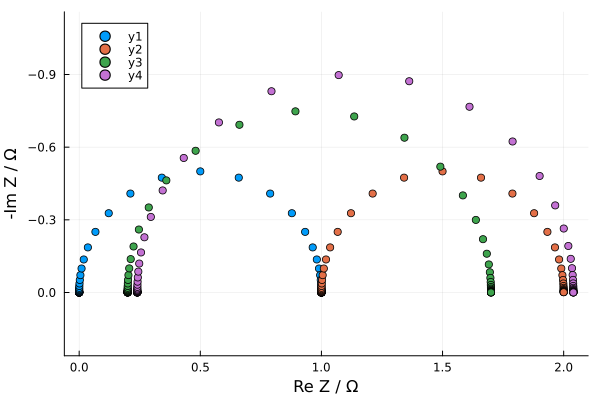

In [6]:
combined_circuit2 = 0.2r-1.5r/0.1c
combined_circuit3 = 1.2combined_circuit2
plot_Nyquist!(plt,combined_circuit2,combined_circuit3)

For elements like CPEs and Warburgs which have exponential parameters, you can change those parameters using `^`.

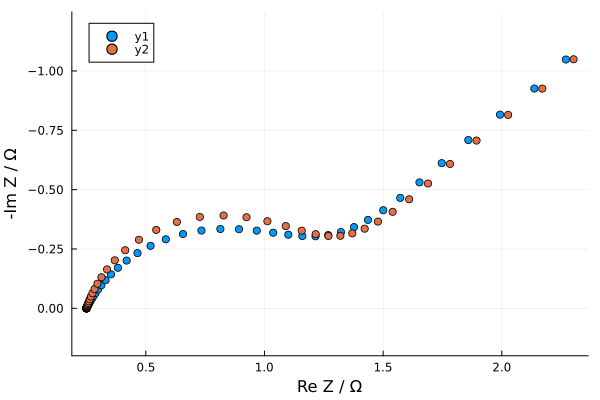

In [7]:
randles_circuit1 = 0.25r-(r-0.05wo^80)/2q^0.7
randles_circuit2 = 0.25r-(r-0.05wo^80)/2q^0.8
plot_Nyquist(randles_circuit1,randles_circuit2)

The full list of default circuit element parameters are as follows:
```julia
    Resistor()      = 1.0r
    Capacitor()     = 1.0c
    Inductor()      = 1.0l
    CPE()           = 1.0q^0.8
    Warburg("short")= 1.0ws^1.0
    Warburg("open") = 1.0wo^1.0

On top of parameters, these structs hold the complex AC impedance `Z` as well as the frequencies `ω` over which `Z` is evaulated

## Circuits

Circuits, which are constructed from circuit elements, store `ω` and `Z`. But they also contain the list of element expressions and operators which comprise the circuit. This enables circuits to be freely manipulated by changing parameters or changing the range of frequencies over which the impedance is calculated. Below is a quick demonstration of the ability to manipulate circuit parameters.

In [8]:
circuit = 0.23r-(r-0.025wo^80)/0.2q 
print(circuit.elements)

Expr[:(0.23r), :(1.0r), :(0.025 * wo ^ 80.0), :(0.2 * q ^ 0.8)]

In [9]:
using EISAnalysis: get_params,set_params
p = get_params(circuit)
print(p)

Any[0.23, 1.0, (0.025, 80.0), (0.2, 0.8)]

Any[:(0.5r), :(1.0r), :(0.025 * wo ^ 80.0), :(0.2 * q ^ 0.8)]


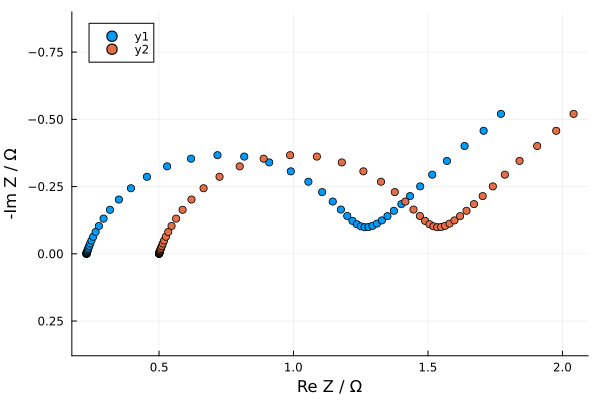

In [10]:
p[1] = 0.5
updated_circuit = set_params(circuit,p)
println(updated_circuit.elements)
plot_Nyquist(circuit,updated_circuit)

Furthermore, when fitting to experimental data, the `~` operator has been overloaded to do just that.

In [11]:
ω_data = collect(logrange(1e-02,1e01,10))
@time updated_circuit2 = circuit ~ ω
@time r~ω
plot_Nyquist(circuit,updated_circuit2)

UndefVarError: UndefVarError: `ω` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

## Circuit Fitting

This package uses LsqFit.jl to optimize circuit parameters to fit to data. The `Circuit` functionalities above make it easy to build custom circuit models. Let's take an example here using Li-ion EIS data found from Mendeley Data.

In [12]:
#Here is some raw LiB EIS data from Mendeley Data
using CSV,DataFrames,Plots
ω_exp =  [ 0.05, 0.1, 0.2, 0.4, 1, 2, 4, 10, 20, 40, 100, 200, 400, 1000]
data = CSV.read("Data/EIS_Data.csv",DataFrame)
Z_exp = data[!,"Re(Z)"]-im*data[!,"-Im(Z)"]
plt =scatter(Z_data,label = "data",aspect_ratio=:equal)
plot!(plt,ylims = (-0.01,0),yflip=true)

UndefVarError: UndefVarError: `Z_data` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

This data can be fit in many ways. The commonly-chosen model here is a randles circuit. The initial guess of parameters is written directly the circuit definition.

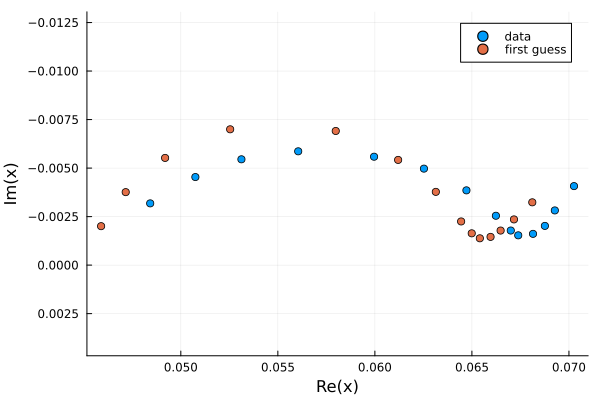

In [25]:
randles_circuit = (0.045r-(0.02r-0.001wo^25)/2q) ~ ω_exp
plt =scatter(Z_exp,label = "data")
scatter!(plt,randles_circuit.Z,label  = "first guess")
plot!(plt,yflip=true,aspect_ratio=:equal)

Parameters
__________
Any[:(0.046027r), :(0.021282r), :(0.0010941 * wo ^ 21.839), :(4.0056 * q ^ 0.65659)]

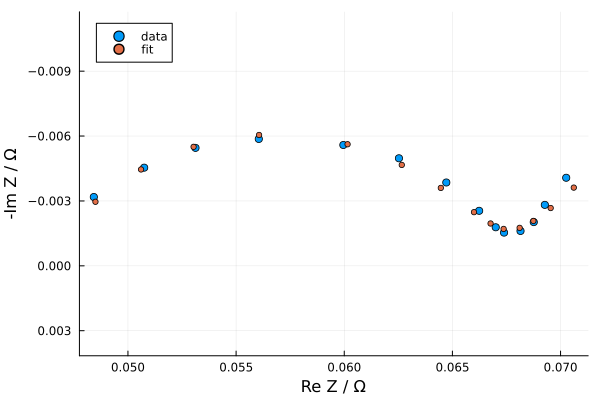

EISAnalysis.Circuit(Real[0.05, 0.1, 0.2, 0.4, 1.0, 2.0, 4.0, 10.0, 20.0, 40.0, 100.0, 200.0, 400.0, 1000.0], ComplexF64[0.07061179523546973 - 0.0036161366757002586im, 0.06954307187666481 - 0.0026715521535557504im, 0.06874379564835513 - 0.0020763517117051954im, 0.06810812559118191 - 0.0017552263613986026im, 0.06736749739341655 - 0.0017060927852878705im, 0.066764686487546 - 0.0019573565714202266im, 0.06599895839171742 - 0.0024813832147565526im, 0.06446508247644935 - 0.0036020266237018496im, 0.06265958883350577 - 0.004664502602918982im, 0.06015344812037913 - 0.005620471222819887im, 0.05606188291759614 - 0.006049061177104257im, 0.053034945917901526 - 0.005501458630241011im, 0.05060616191363954 - 0.004454884628732528im, 0.048497540869868086 - 0.0029615176982271175im], Any[:(0.046027r ~ [0.05, 0.1, 0.2, 0.4, 1.0, 2.0, 4.0, 10.0, 20.0, 40.0, 100.0, 200.0, 400.0, 1000.0]), :(0.021282r ~ [0.05, 0.1, 0.2, 0.4, 1.0, 2.0, 4.0, 10.0, 20.0, 40.0, 100.0, 200.0, 400.0, 1000.0]), :(0.0010941 * wo ^ 21.

In [29]:
fit = circuit_fit(randles_circuit,ω_exp,Z_exp)

Whether a randles circuit is the best model for this particular dataset is a different story. This same data can be fit using `compute_drt()`, which is demonstrated in the DRT notebook.